# **Proceso de Preparación y EDA PriceHouse**

**Autor** : Oscar Andres Gaspar Alvarez


**Tabla de Contenido**

* 1) Librerias
* 2) Importación Datos
* 3) Depuración de Datos
* 4) Pipeline Imputación y Estandarización de Variables
* 5) Análisis Univariado del Target 
* 6) Análisis de Correlación entre Features
* 7) Selección de Features

# **Filtro de Fechasy Operacion a Realizar**

In [3]:
Operacion="Test"
Temporada=2024
Liga="Bundesliga2"

In [4]:
FechaInicialTest="2023-10-24"
FechaFinalTest="2023-11-27"

# **1) Librerias** 

In [5]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import datetime as datetime
from itertools import islice
import unidecode
# Gráficos
# ==============================================================================
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Modelado
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline  import Pipeline 
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import pickle as pk
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import pycaret
from pycaret.regression import *
import imblearn
import catboost
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import lightgbm as lgb
import shap
import xgboost as xgb
import pickle

import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Dividir la data en entraniemo y prueba

# Funciones 
import utils
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 100)

# **2) Importación Datos**

In [6]:
df = pd.read_csv("Insumos/ActualBundesliga2.csv", index_col=0)
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team
0,2023-07-29,13:00,2. Bundesliga,Matchweek 1,Sat,Away,W,2.000,1.000,Kaiserslautern,2.300,1.100,49.000,44079.000,Jackson Irvine,3-4-3,Robert Schröder,Match Report,NaN,17.000,4.000,20.200,1.000,1.000,2024,St Pauli
1,2023-08-05,13:00,2. Bundesliga,Matchweek 2,Sat,Home,D,0.000,0.000,Düsseldorf,1.400,0.600,54.000,29546.000,Jackson Irvine,3-4-3,Daniel Schlager,Match Report,NaN,13.000,5.000,18.200,0.000,0.000,2024,St Pauli
3,2023-08-19,13:00,2. Bundesliga,Matchweek 3,Sat,Away,D,0.000,0.000,Greuther Fürth,1.100,1.000,58.000,12207.000,Jackson Irvine,3-4-3,Tom Bauer,Match Report,NaN,7.000,1.000,18.200,0.000,0.000,2024,St Pauli
4,2023-08-27,13:30,2. Bundesliga,Matchweek 4,Sun,Home,D,0.000,0.000,Magdeburg,1.300,0.500,43.000,29546.000,Jackson Irvine,3-4-3,Sven Jablonski,Match Report,NaN,28.000,12.000,17.600,0.000,0.000,2024,St Pauli
5,2023-09-01,18:30,2. Bundesliga,Matchweek 5,Fri,Away,D,1.000,1.000,Braunschweig,1.200,0.800,62.000,21290.000,Jackson Irvine,4-2-3-1,Florian Lechner,Match Report,NaN,19.000,4.000,19.000,0.000,0.000,2024,St Pauli


In [7]:
df.season.unique()

array([2024, 2023, 2022, 2021, 2020])

In [158]:
df = df[df['result'].notnull()]

In [159]:
df.shape

(2470, 24)

In [160]:
(df.date.min(),df.date.max())

('2019-07-26', '2023-08-04')

### **Datos Recientes**

In [161]:
#df1 = pd.read_csv("Insumos/ActualBundesliga2.csv", index_col=0)
#df1 = df1[df1['result'].notnull()]

In [162]:
df2 = pd.read_csv("Insumos/ActualBundesliga2_2024.csv", index_col=0)

In [163]:
(df2.date.min(),df2.date.max())

('2023-07-28', '2024-05-19')

In [11]:
df_total=pd.concat([df,df1,df2]).reset_index(drop=True)
df_total["Llave"]=df_total.date.astype(str)+df_total.team+df_total.opponent
df_total=df_total.drop_duplicates(['Llave'])

In [12]:
duplicados = df_total[df_total.duplicated(['Llave'])]
duplicados

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave


In [13]:
df=df_total.sort_values("date")

In [14]:
df[df["date"]=="2023-10-28"].head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave
3904,2023-10-28,NaN,2. Bundesliga,Matchweek 11,Sat,Away,NaN,NaN,NaN,Greuther Fürth,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Osnabruck,NaN,NaN,2023-10-28OsnabruckGreuther Fürth
2675,2023-10-28,13:00,2. Bundesliga,Matchweek 11,Sat,Home,W,3.000,2.000,Hannover 96,45.000,62271.000,Marcin Kamiński,5-4-1,Timo Gerach,Match Report,NaN,11.000,6.000,15.000,0.000,0.000,2024,Schalke 04,1.700,1.800,2023-10-28Schalke 04Hannover 96
3802,2023-10-28,NaN,2. Bundesliga,Matchweek 11,Sat,Away,NaN,NaN,NaN,Magdeburg,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2023-10-28ElversbergMagdeburg
3768,2023-10-28,NaN,2. Bundesliga,Matchweek 11,Sat,Home,NaN,NaN,NaN,Düsseldorf,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Eintracht Braunschweig,NaN,NaN,2023-10-28Eintracht BraunschweigDüsseldorf
2662,2023-10-28,13:00,2. Bundesliga,Matchweek 11,Sat,Away,L,1.000,2.000,St. Pauli,40.000,29125.000,Marvin Wanitzek,4-3-1-2,Max Burda,Match Report,NaN,7.000,3.000,17.900,0.000,0.000,2024,Karlsruher,0.500,1.100,2023-10-28KarlsruherSt. Pauli


## **Excluimos Partidos Pospuestos**

In [15]:
df.attendance=df.attendance
print(df["notes"].unique())

[nan]


In [16]:
df=df[df.notes != "Match Postponed"].reset_index(drop=True)

## **Formato Date a Fecha del Partido**

In [17]:
df['date']=pd.to_datetime(df['date'], format='%Y/%m/%d')

## **Definicion del Target**

In [18]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave
0,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Away,L,1.000,2.000,Stuttgart,36.000,52021.000,Marvin Bakalorz,4-3-3,Felix Brych,Match Report,NaN,7.000,2.000,NaN,0.000,0.000,2020,Hannover 96,NaN,NaN,2019-07-26Hannover 96Stuttgart
1,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Home,W,2.000,1.000,Hannover 96,64.000,52021.000,Marc-Oliver Kempf,4-4-2◆,Felix Brych,Match Report,NaN,14.000,7.000,NaN,0.000,0.000,2020,Stuttgart,NaN,NaN,2019-07-26StuttgartHannover 96
2,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,D,1.000,1.000,Sandhausen,69.000,10103.000,Hauke Wahl,4-2-3-1,Tobias Stieler,Match Report,NaN,21.000,3.000,NaN,0.000,0.000,2020,Holstein Kiel,NaN,NaN,2019-07-27Holstein KielSandhausen
3,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Away,W,3.000,1.000,Osnabrück,58.000,12909.000,Marc Schnatterer,4-2-2-2,Sascha Stegemann,Match Report,NaN,10.000,6.000,NaN,0.000,0.000,2020,Heidenheim,NaN,NaN,2019-07-27HeidenheimOsnabrück
4,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,L,1.000,3.000,Heidenheim,43.000,12909.000,David Blacha,3-4-3,Sascha Stegemann,Match Report,NaN,9.000,2.000,NaN,0.000,0.000,2020,Osnabruck,NaN,NaN,2019-07-27OsnabruckHeidenheim


In [19]:
df.result.value_counts(normalize=True)

L   0.367
W   0.367
D   0.265
Name: result, dtype: float64

In [20]:
#df['target'] = (df['gf'] > 0) & (df['ga'] > 0)
#df['target'] = df['target'].astype(int)

In [21]:
#df.head()

In [22]:
def assign_target(result):
    if result == 'W' or result == 'D':
        return 1
    elif result == 'L':
        return 0


# Aplicar la función personalizada a la columna 'result' y crear una nueva columna 'target'
df['target'] = df['result'].apply(assign_target)

df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target
0,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Away,L,1.000,2.000,Stuttgart,36.000,52021.000,Marvin Bakalorz,4-3-3,Felix Brych,Match Report,NaN,7.000,2.000,NaN,0.000,0.000,2020,Hannover 96,NaN,NaN,2019-07-26Hannover 96Stuttgart,0.000
1,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Home,W,2.000,1.000,Hannover 96,64.000,52021.000,Marc-Oliver Kempf,4-4-2◆,Felix Brych,Match Report,NaN,14.000,7.000,NaN,0.000,0.000,2020,Stuttgart,NaN,NaN,2019-07-26StuttgartHannover 96,1.000
2,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,D,1.000,1.000,Sandhausen,69.000,10103.000,Hauke Wahl,4-2-3-1,Tobias Stieler,Match Report,NaN,21.000,3.000,NaN,0.000,0.000,2020,Holstein Kiel,NaN,NaN,2019-07-27Holstein KielSandhausen,1.000
3,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Away,W,3.000,1.000,Osnabrück,58.000,12909.000,Marc Schnatterer,4-2-2-2,Sascha Stegemann,Match Report,NaN,10.000,6.000,NaN,0.000,0.000,2020,Heidenheim,NaN,NaN,2019-07-27HeidenheimOsnabrück,1.000
4,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,L,1.000,3.000,Heidenheim,43.000,12909.000,David Blacha,3-4-3,Sascha Stegemann,Match Report,NaN,9.000,2.000,NaN,0.000,0.000,2020,Osnabruck,NaN,NaN,2019-07-27OsnabruckHeidenheim,0.000


In [23]:
df.target.value_counts()

1.000    1697
0.000     985
Name: target, dtype: int64

In [24]:
df.target.value_counts(normalize=True)

1.000   0.633
0.000   0.367
Name: target, dtype: float64

## **Mes del partido**

In [25]:
## Mes
dw_mapping={
    "01": 'Enero', 
    "02": 'Febrero', 
    "03": 'Marzo', 
    "04": 'Abril', 
    "05": 'Mayo',
    "06": 'Junio', 
    "07": 'Julio',
    "08": "Agosto",
    "09": "Septiembre",
    "10": "Octubre",
    "11":"Noviembre",
    "12": "Noviembre"}
df['Mes']=df['date'].dt.strftime('%m').map(dw_mapping)

In [26]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("str")
#df["hour"] = df["hour"].astype(int)
df['hour'].replace({"nan": np.nan}, inplace=True)
df['hour'].fillna("13", inplace=True)

In [27]:
df.tail(5)

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour
3085,2024-05-19,15:30,2. Bundesliga,Matchweek 34,Sun,Home,NaN,NaN,NaN,Schalke 04,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Greuther Furth,NaN,NaN,2024-05-19Greuther FurthSchalke 04,NaN,Mayo,15
3086,2024-05-19,15:30,2. Bundesliga,Matchweek 34,Sun,Away,NaN,NaN,NaN,Kaiserslautern,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Eintracht Braunschweig,NaN,NaN,2024-05-19Eintracht BraunschweigKaiserslautern,NaN,Mayo,15
3087,2024-05-19,15:30,2. Bundesliga,Matchweek 34,Sun,Home,NaN,NaN,NaN,Karlsruher,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2024-05-19ElversbergKarlsruher,NaN,Mayo,15
3088,2024-05-19,15:30,2. Bundesliga,Matchweek 34,Sun,Home,NaN,NaN,NaN,Braunschweig,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Kaiserslautern,NaN,NaN,2024-05-19KaiserslauternBraunschweig,NaN,Mayo,15
3089,2024-05-19,15:30,2. Bundesliga,Matchweek 34,Sun,Home,NaN,NaN,NaN,Hertha BSC,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN,NaN,NaN,NaN,2024,Osnabruck,NaN,NaN,2024-05-19OsnabruckHertha BSC,NaN,Mayo,15


## **Diccionario Variables**

Estándar
* Gls -- Goles marcados o concedidos
* Sh -- Disparos Totales No incluye tiros penales
* SoT -- Disparos al arco
* Nota: Los tiros a puerta no incluyen los tiros penales
* SoT% -- Porcentaje de tiros que dan en el blanco
* Mínimo .395 tiros por juego de equipo para calificar como líder
* Nota: Los tiros a puerta no incluyen los tiros penales
* G/Sh -- Goles por tiro
* Mínimo .395 tiros por juego de equipo para calificar como líder
* G/SoT -- Goles por tiro al arco
* Mínimo .111 tiros al arco por juego de equipo para calificar como líder
* Nota: Los tiros a puerta no incluyen los tiros penales
* Dist -- Distancia promedio, en yardas, desde la portería de todos los tiros realizados
* Mínimo .395 tiros por juego de equipo para calificar como líder
No incluye tiros penales
* FK -- Remates de tiros libres
* PK -- Penales anotados
* PKatt -- Intento de tiros penales

# **3) Depuración de Datos**

## **Homologación de Teams**

In [28]:
Teams=pd.DataFrame({"team":list(df.team.unique()),
              "opponent":list(df.opponent.unique())}).sort_values(["team"],ascending = [True])

Teams.to_excel("Insumos/TeamsBundesliga2.xlsx",index=False)

In [29]:
MaestroTeams=pd.read_excel("Insumos/HomologacionBundesliga2.xlsx")
df=df.merge(MaestroTeams, on='opponent', how='left')

In [30]:
df.opponent=df.Homologacion
df.drop(columns=["Homologacion"],inplace=True)

In [31]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour
0,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Away,L,1.000,2.000,Stuttgart,36.000,52021.000,Marvin Bakalorz,4-3-3,Felix Brych,Match Report,NaN,7.000,2.000,NaN,0.000,0.000,2020,Hannover 96,NaN,NaN,2019-07-26Hannover 96Stuttgart,0.000,Julio,20
1,2019-07-26,20:30,2. Bundesliga,Matchweek 1,Fri,Home,W,2.000,1.000,Hannover 96,64.000,52021.000,Marc-Oliver Kempf,4-4-2◆,Felix Brych,Match Report,NaN,14.000,7.000,NaN,0.000,0.000,2020,Stuttgart,NaN,NaN,2019-07-26StuttgartHannover 96,1.000,Julio,20
2,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,D,1.000,1.000,Sandhausen,69.000,10103.000,Hauke Wahl,4-2-3-1,Tobias Stieler,Match Report,NaN,21.000,3.000,NaN,0.000,0.000,2020,Holstein Kiel,NaN,NaN,2019-07-27Holstein KielSandhausen,1.000,Julio,15
3,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Away,W,3.000,1.000,Osnabruck,58.000,12909.000,Marc Schnatterer,4-2-2-2,Sascha Stegemann,Match Report,NaN,10.000,6.000,NaN,0.000,0.000,2020,Heidenheim,NaN,NaN,2019-07-27HeidenheimOsnabrück,1.000,Julio,15
4,2019-07-27,15:30,2. Bundesliga,Matchweek 1,Sat,Home,L,1.000,3.000,Heidenheim,43.000,12909.000,David Blacha,3-4-3,Sascha Stegemann,Match Report,NaN,9.000,2.000,NaN,0.000,0.000,2020,Osnabruck,NaN,NaN,2019-07-27OsnabruckHeidenheim,0.000,Julio,15


## **Elimiación Variables**

In [32]:
VariablesEliminar=["captain","referee","match report"]

In [33]:
df=df.drop(columns=VariablesEliminar)

In [34]:
df.formation.unique()

array(['4-3-3', '4-4-2◆', '4-2-3-1', '4-2-2-2', '3-4-3', '4-4-2',
       '4-1-4-1', '4-5-1', '3-1-4-2', '4-4-1-1', '3-4-1-2', '3-4-3◆',
       '5-4-1', '4-3-1-2', '4-3-2-1', '4-1-3-2', '3-5-2', '3-5-1-1',
       '3-3-3-1', '5-3-2', '3-2-4-1', nan, '4-1-2-1-2◆'], dtype=object)

## **Correccion de Variables Formation**

In [35]:
df.formation=df.formation.str.replace('◆', '')

## **3.1 Mapear Variables**

In [36]:
Mapeo1=utils.mapeo_de_variables(df)
Mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
13,notes,3090,float64,0,[],100.000
22,xga,2878,float64,34,"[2.5, 2.0, 1.4, 1.9, 1.3, 1.1, 0.6, 1.7, 2.4, ...",93.139
16,dist,2878,float64,93,"[17.7, 19.8, 21.6, 19.4, 20.3, 16.0, 20.6, 18....",93.139
21,xg,2878,float64,34,"[1.1, 1.3, 0.6, 2.0, 2.5, 1.9, 1.4, 1.7, 2.1, ...",93.139
11,attendance,1142,float64,789,"[52021.0, 10103.0, 12909.0, 29753.0, 10268.0, ...",36.958
10,poss,414,float64,57,"[36.0, 64.0, 69.0, 58.0, 43.0, 31.0, 39.0, 55....",13.398
12,formation,409,object,20,"[4-3-3, 4-4-2, 4-2-3-1, 4-2-2-2, 3-4-3, 4-1-4-...",13.236
24,target,408,float64,2,"[0.0, 1.0]",13.204
6,result,408,object,3,"[L, W, D]",13.204
7,gf,408,float64,9,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",13.204


## **3.2) Identificación Variables Constantes**

In [37]:
df,constantes=utils.identifica_la_lista_de_variables_constantes_y_las_elimina(df,Mapeo1)

In [38]:
print(f'Cantidad de Variables constantes eliminadas: {len(constantes)} y son : {constantes}')

Cantidad de Variables constantes eliminadas: 2 y son : ['notes', 'comp']


In [39]:
print(f'Dimensión Nueva: {df.shape}')

Dimensión Nueva: (3090, 25)


In [40]:
Mapeo1=utils.mapeo_de_variables(df)
Mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2878,float64,34,"[1.1, 1.3, 0.6, 2.0, 2.5, 1.9, 1.4, 1.7, 2.1, ...",93.139
20,xga,2878,float64,34,"[2.5, 2.0, 1.4, 1.9, 1.3, 1.1, 0.6, 1.7, 2.4, ...",93.139
14,dist,2878,float64,93,"[17.7, 19.8, 21.6, 19.4, 20.3, 16.0, 20.6, 18....",93.139
10,attendance,1142,float64,789,"[52021.0, 10103.0, 12909.0, 29753.0, 10268.0, ...",36.958
9,poss,414,float64,57,"[36.0, 64.0, 69.0, 58.0, 43.0, 31.0, 39.0, 55....",13.398
11,formation,409,object,20,"[4-3-3, 4-4-2, 4-2-3-1, 4-2-2-2, 3-4-3, 4-1-4-...",13.236
5,result,408,object,3,"[L, W, D]",13.204
6,gf,408,float64,9,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",13.204
7,ga,408,float64,9,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",13.204
22,target,408,float64,2,"[0.0, 1.0]",13.204


# **Proceso de Imputacion con Machine Learning**

**Imputacion attendance**

In [41]:
Mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2878,float64,34,"[1.1, 1.3, 0.6, 2.0, 2.5, 1.9, 1.4, 1.7, 2.1, ...",93.139
20,xga,2878,float64,34,"[2.5, 2.0, 1.4, 1.9, 1.3, 1.1, 0.6, 1.7, 2.4, ...",93.139
14,dist,2878,float64,93,"[17.7, 19.8, 21.6, 19.4, 20.3, 16.0, 20.6, 18....",93.139
10,attendance,1142,float64,789,"[52021.0, 10103.0, 12909.0, 29753.0, 10268.0, ...",36.958
9,poss,414,float64,57,"[36.0, 64.0, 69.0, 58.0, 43.0, 31.0, 39.0, 55....",13.398
11,formation,409,object,20,"[4-3-3, 4-4-2, 4-2-3-1, 4-2-2-2, 3-4-3, 4-1-4-...",13.236
5,result,408,object,3,"[L, W, D]",13.204
6,gf,408,float64,9,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",13.204
7,ga,408,float64,9,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",13.204
22,target,408,float64,2,"[0.0, 1.0]",13.204


# **New Features**

In [42]:
df=utils.recodificacion_variables(df,Mapeo1,n_cat=2)

In [43]:
numeric_cols,cat_cols=utils.type_cols(df.drop(columns=["result","target","date","time","Llave"]))
print(f'Cantidad de Variables Numericas : {len(numeric_cols)}')
print(f'Cantidad de Variables Categóricas : {len(cat_cols)}') 

Cantidad de Variables Numericas : 12
Cantidad de Variables Categóricas : 8


In [44]:
df[cat_cols].tail(2)

,round,day,venue,opponent,formation,team,Mes,hour
3088,Matchweek 34,Sun,Home,Eintracht Braunschweig,NaN,Kaiserslautern,Mayo,15
3089,Matchweek 34,Sun,Home,Hertha BSC,NaN,Osnabruck,Mayo,15


In [45]:
df[numeric_cols].tail(2)

,gf,ga,poss,attendance,sh,sot,dist,pk,pkatt,season,xg,xga
3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,NaN,NaN
3089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,NaN,NaN


In [46]:
# Filtrar las filas con nulos en la columna 'A'
df_Nuevos = df.loc[df['result'].isnull()].reset_index(drop=True)
df_Nuevos.shape

(408, 25)

In [47]:
df_Nuevos.head()

,date,time,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour
0,2023-10-28,NaN,Matchweek 11,Sat,Away,NaN,NaN,NaN,Greuther Furth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Osnabruck,NaN,NaN,2023-10-28OsnabruckGreuther Fürth,NaN,Octubre,13
1,2023-10-28,NaN,Matchweek 11,Sat,Away,NaN,NaN,NaN,Magdeburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2023-10-28ElversbergMagdeburg,NaN,Octubre,13
2,2023-10-28,NaN,Matchweek 11,Sat,Home,NaN,NaN,NaN,Dusseldorf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Eintracht Braunschweig,NaN,NaN,2023-10-28Eintracht BraunschweigDüsseldorf,NaN,Octubre,13
3,2023-10-28,NaN,Matchweek 11,Sat,Home,NaN,NaN,NaN,Elversberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Magdeburg,NaN,NaN,2023-10-28MagdeburgElversberg,NaN,Octubre,13
4,2023-10-28,NaN,Matchweek 11,Sat,Home,NaN,NaN,NaN,Osnabruck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Greuther Furth,NaN,NaN,2023-10-28Greuther FurthOsnabrück,NaN,Octubre,13


In [48]:
df_Nuevos.date[0]

Timestamp('2023-10-28 00:00:00')

In [49]:
FechaFinalTest

'2023-11-27'

In [50]:
df=df[df["date"]<=FechaFinalTest].reset_index(drop=True)

In [51]:
Mapeo2=utils.mapeo_de_variables(df)
Mapeo2

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2518,float64,34,"[1.1, 1.3, 0.6, 2.0, 2.5, 1.9, 1.4, 1.7, 2.1, ...",92.234
20,xga,2518,float64,34,"[2.5, 2.0, 1.4, 1.9, 1.3, 1.1, 0.6, 1.7, 2.4, ...",92.234
14,dist,2518,float64,93,"[17.7, 19.8, 21.6, 19.4, 20.3, 16.0, 20.6, 18....",92.234
10,attendance,782,float64,789,"[52021.0, 10103.0, 12909.0, 29753.0, 10268.0, ...",28.645
9,poss,54,float64,57,"[36.0, 64.0, 69.0, 58.0, 43.0, 31.0, 39.0, 55....",1.978
11,formation,49,category,20,"[4-3-3, 4-4-2, 4-2-3-1, 4-2-2-2, 3-4-3, 4-1-4-...",1.795
5,result,48,category,3,"[L, W, D]",1.758
6,gf,48,float64,9,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",1.758
7,ga,48,float64,9,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",1.758
22,target,48,category,2,"[0.0, 1.0]",1.758


## **Imputación Datos**

In [52]:
df['attendance'].describe()

count    1948.000
mean    19290.119
std     13736.772
min       250.000
25%      9580.000
50%     15000.000
75%     26350.000
max     66113.000
Name: attendance, dtype: float64

In [53]:
df['attendance']=df['attendance']/1000

In [54]:
df['attendance'].describe()

count   1948.000
mean      19.290
std       13.737
min        0.250
25%        9.580
50%       15.000
75%       26.350
max       66.113
Name: attendance, dtype: float64

In [55]:
df_grouped = df.groupby('team').agg({'attendance': 'mean'})
df_grouped["team"]=df_grouped.index
df_grouped.rename(columns={"attendance":"attendance1","dist":"dist1"},inplace=True)
df_grouped.reset_index(drop=True,inplace=True)

In [56]:
df_grouped.head()

,attendance1,team
0,21.634,Arminia
1,15.726,Bochum
2,15.766,Darmstadt 98
3,19.507,Dresden
4,21.389,Dusseldorf


In [57]:
df=pd.merge(df, df_grouped, on='team', how='left')

In [58]:
df["attendance"][df['attendance'].isnull()]=df["attendance1"][df['attendance'].isnull()]
#df["dist"][df['dist'].isnull()]=df["dist1"][df['dist'].isnull()]

In [59]:
Mapeo2=utils.mapeo_de_variables(df)
Mapeo2

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2518,float64,34,"[1.1, 1.3, 0.6, 2.0, 2.5, 1.9, 1.4, 1.7, 2.1, ...",92.234
20,xga,2518,float64,34,"[2.5, 2.0, 1.4, 1.9, 1.3, 1.1, 0.6, 1.7, 2.4, ...",92.234
14,dist,2518,float64,93,"[17.7, 19.8, 21.6, 19.4, 20.3, 16.0, 20.6, 18....",92.234
9,poss,54,float64,57,"[36.0, 64.0, 69.0, 58.0, 43.0, 31.0, 39.0, 55....",1.978
11,formation,49,category,20,"[4-3-3, 4-4-2, 4-2-3-1, 4-2-2-2, 3-4-3, 4-1-4-...",1.795
22,target,48,category,2,"[0.0, 1.0]",1.758
5,result,48,category,3,"[L, W, D]",1.758
6,gf,48,float64,9,"[1.0, 2.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",1.758
7,ga,48,float64,9,"[2.0, 1.0, 3.0, 0.0, 4.0, 5.0, 6.0, 8.0, 7.0]",1.758
12,sh,48,float64,33,"[7.0, 14.0, 21.0, 10.0, 9.0, 15.0, 5.0, 16.0, ...",1.758


## **Promedio de Variables Numericas Últimas Jornadas**

In [60]:
variables = ['gf', 'ga', 'poss', 'attendance', 'sh', 'sot']

In [61]:
df[variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730 entries, 0 to 2729
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gf          2682 non-null   float64
 1   ga          2682 non-null   float64
 2   poss        2676 non-null   float64
 3   attendance  2730 non-null   float64
 4   sh          2682 non-null   float64
 5   sot         2682 non-null   float64
dtypes: float64(6)
memory usage: 213.8 KB


In [62]:
# Calcular el promedio de los últimos tres partidos para cada variable
variables = ['gf', 'ga', 'poss', 'attendance', 'sh', 'sot']
ListaEquipos=df.team.unique().tolist()

Total = pd.DataFrame()
for i in range(len(ListaEquipos)):
    Equipo = df[df.team==ListaEquipos[i]].sort_values("date")
    Equipo['puntos'] = Equipo['result'].map({'W': 3, 'D': 1, 'L': 0})
    # Ordenar los datos por fecha de forma ascendente
    Equipo = Equipo.sort_values(by='date', ascending=True)
    Equipo['puntos'].fillna(0, inplace=True)
    Equipo['puntos'] = Equipo['puntos'].astype(int)
    # Calcular la suma acumulativa de los puntos hasta la fecha actual
    Equipo['suma_puntos'] = Equipo['puntos'].cumsum()
    ### Resultados Ultimos 5 partidos
    Equipo["last1"]=Equipo[["result"]].shift(1)
    Equipo["last2"]=Equipo[["result"]].shift(2)
    Equipo["last3"]=Equipo[["result"]].shift(3)
    Equipo["last4"]=Equipo[["result"]].shift(4)
    Equipo["last5"]=Equipo[["result"]].shift(5)
    ### DOnde jugo los ultimos partidos
    Equipo["Local1"]=Equipo[["venue"]].shift(1)
    Equipo["Local2"]=Equipo[["venue"]].shift(2)
    Equipo["Local3"]=Equipo[["venue"]].shift(3)
    Equipo["Local4"]=Equipo[["venue"]].shift(4)
    Equipo["Local5"]=Equipo[["venue"]].shift(5)
    ## Goles eltimos partidos
    Equipo["ga1"]=Equipo[["ga"]].shift(1)
    Equipo["ga2"]=Equipo[["ga"]].shift(2)
    Equipo["ga3"]=Equipo[["ga"]].shift(3)
    Equipo["ga4"]=Equipo[["ga"]].shift(4)
    Equipo["ga5"]=Equipo[["ga"]].shift(5)
    ## Goles encontra eltimos partidos
    Equipo["gf1"]=Equipo[["gf"]].shift(1)
    Equipo["gf2"]=Equipo[["gf"]].shift(2)
    Equipo["gf3"]=Equipo[["gf"]].shift(3)
    Equipo["gf4"]=Equipo[["gf"]].shift(4)
    Equipo["gf5"]=Equipo[["gf"]].shift(5)
    
    
    num_partidos_anteriores = 4
    for variable in variables:
        Equipo[f'{variable}_promedio'] = Equipo[variable].rolling(window=num_partidos_anteriores,min_periods=3).apply(lambda x: x[:-1].mean())
        Equipo[f'{variable}_lag1'] = Equipo[variable].shift(1)
    # Imprimir los resultados
    #Equipo=Equipo[['date', 'team',"result","suma_puntos","last1","last2","last3","last4","last5"] + [f'{variable}_lag1' for variable in variables]+ [f'{variable}_promedio' for variable in variables]]
    Total = pd.concat([Total, Equipo])

In [63]:
Total=Total.reset_index(drop=True)

In [64]:
Total['last1'] = Total['last1'].fillna("SinResultado")
Total['last2'] = Total['last2'].fillna("SinResultado")
Total['last3'] = Total['last3'].fillna("SinResultado")
Total['last4'] = Total['last4'].fillna("SinResultado")
Total['last5'] = Total['last5'].fillna("SinResultado")

Total['Local1'] = Total['Local1'].fillna("SinResultado")
Total['Local2'] = Total['Local1'].fillna("SinResultado")
Total['Local3'] = Total['Local1'].fillna("SinResultado")
Total['Local4'] = Total['Local1'].fillna("SinResultado")
Total['Local5'] = Total['Local1'].fillna("SinResultado")

Equipo["ga1"]=Equipo[["ga"]].fillna(0)
Equipo["ga2"]=Equipo[["ga"]].fillna(0)
Equipo["ga3"]=Equipo[["ga"]].fillna(0)
Equipo["ga4"]=Equipo[["ga"]].fillna(0)
Equipo["ga5"]=Equipo[["ga"]].fillna(0)
    ## Goles encontra eltimos partidos
Equipo["gf1"]=Equipo[["gf"]].fillna(0)
Equipo["gf2"]=Equipo[["gf"]].fillna(0)
Equipo["gf3"]=Equipo[["gf"]].fillna(0)
Equipo["gf4"]=Equipo[["gf"]].fillna(0)
Equipo["gf5"]=Equipo[["gf"]].fillna(0)

In [65]:
Total.tail()

,date,time,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour,attendance1,puntos,suma_puntos,last1,last2,last3,last4,last5,Local1,Local2,Local3,Local4,Local5,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
2725,2023-11-03,18:30,Matchweek 12,Fri,Home,L,0.000,2.000,St Pauli,48.000,10.150,4-4-2,7.000,2.000,18.000,0.000,0.000,2024,Elversberg,0.300,0.600,2023-11-03ElversbergSt. Pauli,0.000,Noviembre,18,18.736,0,18,W,SinResultado,W,D,D,Away,Away,Away,Away,Away,1.000,NaN,0.000,1.000,1.000,2.000,NaN,3.000,1.000,1.000,2.500,2.000,0.500,1.000,42.500,30.000,16.538,22.166,11.000,8.000,5.000,3.000
2726,2023-11-04,NaN,Matchweek 12,Sat,Home,NaN,NaN,NaN,St Pauli,NaN,18.736,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2023-11-04ElversbergSt. Pauli,NaN,Noviembre,13,18.736,0,18,L,W,SinResultado,W,D,Home,Home,Home,Home,Home,2.000,1.000,NaN,0.000,1.000,0.000,2.000,NaN,3.000,1.000,NaN,0.000,NaN,2.000,NaN,48.000,17.017,10.150,NaN,7.000,NaN,2.000
2727,2023-11-10,18:30,Matchweek 13,Fri,Away,W,2.000,1.000,Schalke 04,44.000,61.110,4-4-2,13.000,6.000,21.200,0.000,0.000,2024,Elversberg,0.700,2.200,2023-11-10ElversbergSchalke 04,1.000,Noviembre,18,18.736,3,21,SinResultado,L,W,SinResultado,W,Home,Home,Home,Home,Home,NaN,2.000,1.000,NaN,0.000,NaN,0.000,2.000,NaN,3.000,1.000,NaN,1.500,NaN,39.000,NaN,17.017,18.736,7.500,NaN,2.500,NaN
2728,2023-11-11,NaN,Matchweek 13,Sat,Away,NaN,NaN,NaN,Schalke 04,NaN,18.736,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2023-11-11ElversbergSchalke 04,NaN,Noviembre,13,18.736,0,21,W,SinResultado,L,W,SinResultado,Away,Away,Away,Away,Away,1.000,NaN,2.000,1.000,NaN,2.000,NaN,0.000,2.000,NaN,NaN,2.000,NaN,1.000,NaN,44.000,29.999,61.110,NaN,13.000,NaN,6.000
2729,2023-11-25,NaN,Matchweek 14,Sat,Home,NaN,NaN,NaN,Paderborn 07,NaN,18.736,NaN,NaN,NaN,NaN,NaN,NaN,2024,Elversberg,NaN,NaN,2023-11-25ElversbergPaderborn 07,NaN,Noviembre,13,18.736,0,21,SinResultado,W,SinResultado,L,W,Away,Away,Away,Away,Away,NaN,1.000,NaN,2.000,1.000,NaN,2.000,NaN,0.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,32.861,18.736,NaN,NaN,NaN,NaN


In [66]:
Mapeo1=utils.mapeo_de_variables(Total)
Mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2518,float64,34,"[2.5, 1.4, 2.6, 0.6, 1.9, 0.9, 2.3, 1.8, 1.5, ...",92.234
14,dist,2518,float64,93,"[23.6, 21.8, 16.1, 10.7, 20.2, 17.4, 16.0, 18....",92.234
20,xga,2518,float64,34,"[1.1, 1.5, 1.3, 0.8, 1.6, 2.5, 0.7, 1.7, 0.0, ...",92.234
42,ga5,155,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",5.678
47,gf5,155,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",5.678
46,gf4,131,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",4.799
41,ga4,131,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",4.799
45,gf3,110,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",4.029
40,ga3,110,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",4.029
56,sh_promedio,95,float64,71,"[14.5, 13.333333333333334, 14.666666666666666,...",3.480


In [67]:
Total=utils.recodificacion_variables(Total,Mapeo1,n_cat=2)

In [68]:
Total.sort_values("date").tail(30)

,date,time,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour,attendance1,puntos,suma_puntos,last1,last2,last3,last4,last5,Local1,Local2,Local3,Local4,Local5,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
335,2023-11-11,13:00,Matchweek 13,Sat,Home,W,4.000,2.000,Hamburger SV,39.000,15.034,3-4-3,16.000,8.000,18.300,1.000,1.000,2024,Holstein Kiel,2.500,3.300,2023-11-11Holstein KielHamburger SV,1.000,Noviembre,13,14.570,3,219,D,L,SinResultado,W,D,Away,Away,Away,Away,Away,1.000,2.000,NaN,1.000,1.000,1.000,0.000,NaN,3.000,1.000,0.500,1.000,1.500,1.000,56.500,60.000,14.124,15.000,15.500,16.000,5.000,8.000
2395,2023-11-11,13:00,Matchweek 13,Sat,Home,W,3.000,2.000,Osnabruck,39.000,20.327,3-1-4-2,19.000,8.000,12.900,0.000,0.000,2024,Eintracht Braunschweig,3.200,1.700,2023-11-11Eintracht BraunschweigOsnabrück,1.000,Noviembre,13,19.346,3,75,L,SinResultado,SinResultado,L,L,Away,Away,Away,Away,Away,2.000,NaN,NaN,4.000,3.000,0.000,NaN,NaN,1.000,0.000,NaN,0.000,NaN,2.000,NaN,31.000,26.897,42.000,NaN,1.000,NaN,1.000
1973,2023-11-11,NaN,Matchweek 13,Sat,Home,NaN,NaN,NaN,Hannover 96,NaN,22.640,NaN,NaN,NaN,NaN,NaN,NaN,2024,St Pauli,NaN,NaN,2023-11-11St PauliHannover 96,NaN,Noviembre,13,22.640,0,228,D,SinResultado,W,W,D,Home,Home,Home,Home,Home,0.000,NaN,0.000,1.000,2.000,0.000,NaN,2.000,2.000,2.000,NaN,0.000,NaN,0.000,NaN,56.000,18.476,22.640,NaN,13.000,NaN,2.000
2444,2023-11-11,NaN,Matchweek 13,Sat,Home,NaN,NaN,NaN,Elversberg,NaN,30.987,NaN,NaN,NaN,NaN,NaN,NaN,2024,Schalke 04,NaN,NaN,2023-11-11Schalke 04Elversberg,NaN,Noviembre,13,30.987,0,78,L,W,W,L,L,Home,Home,Home,Home,Home,2.000,1.000,2.000,3.000,2.000,1.000,2.000,3.000,0.000,1.000,2.000,1.000,1.667,2.000,50.333,56.000,57.794,61.110,16.333,25.000,4.667,4.000
2311,2023-11-11,13:00,Matchweek 13,Sat,Home,L,1.000,3.000,Nurnberg,72.000,12.249,3-4-1-2,26.000,9.000,16.900,0.000,0.000,2024,Paderborn 07,2.800,1.800,2023-11-11Paderborn 07Nürnberg,0.000,Noviembre,13,12.984,0,171,W,SinResultado,L,D,W,Away,Away,Away,Away,Away,0.000,NaN,3.000,2.000,1.000,3.000,NaN,1.000,2.000,3.000,2.000,3.000,1.500,0.000,61.000,51.000,24.174,23.705,14.500,12.000,4.500,5.000
1246,2023-11-11,13:00,Matchweek 13,Sat,Away,L,2.000,4.000,Holstein Kiel,61.000,15.034,4-3-3,18.000,6.000,13.400,0.000,0.000,2024,Hamburger SV,3.300,2.500,2023-11-11Hamburger SVHolstein Kiel,0.000,Noviembre,13,29.685,0,262,W,D,W,D,W,Home,Home,Home,Home,Home,0.000,3.000,0.000,1.000,0.000,2.000,3.000,2.000,1.000,1.000,2.333,2.000,1.000,0.000,51.333,46.000,53.976,56.800,18.333,17.000,6.333,7.000
1096,2023-11-12,13:30,Matchweek 13,Sun,Home,W,2.000,1.000,Kaiserslautern,49.000,12.100,3-4-3,12.000,6.000,22.400,0.000,0.000,2024,Wehen Wiesbaden,1.200,0.200,2023-11-12Wehen WiesbadenKaiserslautern,1.000,Noviembre,13,14.069,3,55,SinResultado,SinResultado,W,W,SinResultado,Home,Home,Home,Home,Home,NaN,NaN,1.000,0.000,NaN,NaN,NaN,3.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.618,14.069,NaN,NaN,NaN,NaN
2529,2023-11-12,13:30,Matchweek 13,Sun,Away,W,2.000,1.000,Magdeburg,31.000,26.660,4-2-2-2,13.000,2.000,23.400,0.000,0.000,2024,Hansa Rostock,0.700,1.400,2023-11-12Hansa RostockMagdeburg,1.000,Noviembre,13,20.616,3,98,SinResultado,D,SinResultado,L,SinResultado,Away,Away,Away,Away,Away,NaN,0.000,NaN,1.000,NaN,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.411,20.616,NaN,NaN,NaN,NaN
2160,2023-11-12,13:30,Matchweek 13,Sun,Away,L,0.000,1.000,Greuther Furth,52.000,10.097,4-3-3,11.000,3.000,18.600,0.000,0.000,2024,Dusseldorf,0.700,1.100,2023-11-12DusseldorfGreuther Fürth,0.000,Noviembre,13,21.389,0,179,SinResultado,SinResultado,L,SinResultado,W,Away,Away,Away,Away,Away,NaN,NaN,3.000,NaN,1.000,NaN,NaN,1.000,NaN,4.000,NaN,NaN,NaN,NaN,NaN,NaN,23.497,21.389,NaN,NaN,NaN,NaN
2646,2023-11-12,13:30,Matchweek 13,Sun,Away,L,1.000,2.000,Wehen Wiesbaden,51.000,12.100,3-4-1-2,5.000,

In [69]:
encoder = OrdinalEncoder(categories=[['Agosto', 'Septiembre', 'Octubre', 'Noviembre',
                                     'Enero', 'Febrero',"Marzo","Abril","Mayo","Junio","Julio"], ['Mon', 'Thu', 'Wed', 'Tue','Fri','Sat', 'Sun' ],
                                     ['Matchweek 1', 'Matchweek 2', 'Matchweek 3', 'Matchweek 4', 'Matchweek 5',
                                      'Matchweek 6', 'Matchweek 7', 'Matchweek 8', 'Matchweek 9', 'Matchweek 10',
                                      'Matchweek 11', 'Matchweek 12', 'Matchweek 13', 'Matchweek 14', 'Matchweek 15',
                                      'Matchweek 16', 'Matchweek 17', 'Matchweek 18', 'Matchweek 19', 'Matchweek 20',
                                      'Matchweek 21', 'Matchweek 22', 'Matchweek 23', 'Matchweek 24', 'Matchweek 25',
                                       'Matchweek 26', 'Matchweek 27', 'Matchweek 28', 'Matchweek 29', 'Matchweek 30', 
                                       'Matchweek 31', 'Matchweek 32', 'Matchweek 33','Matchweek 34', 
                                      'Matchweek 36', 'Matchweek 37', 'Matchweek 38'],
                                    ["13","14","15","18","20"]])


In [70]:
encoded_data = encoder.fit_transform(Total[['Mes', 'day',"round","hour"]])
Total['Mes'] = encoded_data[:, 0]
Total['day'] = encoded_data[:, 1]
Total['round'] = encoded_data[:, 2]
Total['hour'] = encoded_data[:, 3]

In [71]:
encoder = LabelEncoder()
Total['season'] = encoder.fit_transform(Total['season'])

In [72]:
#stop

In [73]:
Mapeo1=utils.mapeo_de_variables(Total)
Mapeo1

,Variable,Nulos,Tipo Variable,Valores Unicos,Unicos,Porcentaje Nulos
19,xg,2518,float64,34,"[2.5, 1.4, 2.6, 0.6, 1.9, 0.9, 2.3, 1.8, 1.5, ...",92.234
14,dist,2518,float64,93,"[23.6, 21.8, 16.1, 10.7, 20.2, 17.4, 16.0, 18....",92.234
20,xga,2518,float64,34,"[1.1, 1.5, 1.3, 0.8, 1.6, 2.5, 0.7, 1.7, 0.0, ...",92.234
42,ga5,155,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",5.678
47,gf5,155,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",5.678
46,gf4,131,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",4.799
41,ga4,131,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",4.799
45,gf3,110,float64,9,"[1.0, 3.0, 0.0, 2.0, 4.0, 5.0, 7.0, 6.0, 8.0]",4.029
40,ga3,110,float64,9,"[2.0, 1.0, 0.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8.0]",4.029
56,sh_promedio,95,float64,71,"[14.5, 13.333333333333334, 14.666666666666666,...",3.480


In [74]:
numeric_cols,cat_cols=utils.type_cols(Total.drop(columns=["result","puntos","target","date","time","Llave",'gf', 'ga', 'poss', 'attendance', 'sh', 'sot', 'pk', 'pkatt',"attendance1"]))#'suma_puntos'
print(f'Cantidad de Variables Numericas : {len(numeric_cols)}')
print(f'Cantidad de Variables Categóricas : {len(cat_cols)}') 

Cantidad de Variables Numericas : 31
Cantidad de Variables Categóricas : 14


In [75]:
Total[cat_cols]

,venue,opponent,formation,team,last1,last2,last3,last4,last5,Local1,Local2,Local3,Local4,Local5
0,Away,Stuttgart,4-3-3,Hannover 96,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado,SinResultado
1,Home,Jahn Regensburg,3-1-4-2,Hannover 96,L,SinResultado,SinResultado,SinResultado,SinResultado,Away,Away,Away,Away,Away
2,Away,Wehen Wiesbaden,4-4-2,Hannover 96,D,L,SinResultado,SinResultado,SinResultado,Home,Home,Home,Home,Home
3,Home,Greuther Furth,4-2-2-2,Hannover 96,W,D,L,SinResultado,SinResultado,Away,Away,Away,Away,Away
4,Away,Hamburger SV,3-4-1-2,Hannover 96,D,W,D,L,SinResultado,Home,Home,Home,Home,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,Home,St Pauli,4-4-2,Elversberg,W,SinResultado,W,D,D,Away,Away,Away,Away,Away
2726,Home,St Pauli,NaN,Elversberg,L,W,SinResultado,W,D,Home,Home,Home,Home,Home
2727,Away,Schalke 04,4-4-2,Elversberg,SinResultado,L,W,SinResultado,W,Home,Home,Home,Home,Home
2728,Away,Schalke 04,NaN,Elversberg,W,SinResultado,L,W,SinResultado,Away,Away,Away,Away,Away


In [76]:
Total[numeric_cols]

,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,0.000,4.000,NaN,0,NaN,NaN,10.000,4.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000,5.000,NaN,0,NaN,NaN,0.000,2.000,1,2.000,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,2.000,NaN,36.000,NaN,52.021,NaN,7.000,NaN,2.000
2,2.000,5.000,NaN,0,NaN,NaN,0.000,0.000,4,1.000,2.000,NaN,NaN,NaN,1.000,1.000,NaN,NaN,NaN,1.000,1.000,1.500,1.000,52.000,68.000,40.261,28.500,14.500,22.000,4.000,6.000
3,3.000,5.000,NaN,0,NaN,NaN,0.000,0.000,5,0.000,1.000,2.000,NaN,NaN,3.000,1.000,1.000,NaN,NaN,1.667,3.000,1.000,0.000,56.000,64.000,28.709,5.607,13.333,11.000,4.667,6.000
4,4.000,6.000,NaN,0,NaN,NaN,1.000,0.000,5,1.000,0.000,1.000,2.000,NaN,1.000,3.000,1.000,1.000,NaN,1.667,1.000,0.667,1.000,66.333,67.000,19.802,25.300,14.667,11.000,4.667,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,11.000,4.000,18.000,4,0.300,0.600,3.000,3.000,18,1.000,NaN,0.000,1.000,1.000,2.000,NaN,3.000,1.000,1.000,2.500,2.000,0.500,1.000,42.500,30.000,16.538,22.166,11.000,8.000,5.000,3.000
2726,11.000,5.000,NaN,4,NaN,NaN,3.000,0.000,18,2.000,1.000,NaN,0.000,1.000,0.000,2.000,NaN,3.000,1.000,NaN,0.000,NaN,2.000,NaN,48.000,17.017,10.150,NaN,7.000,NaN,2.000
2727,12.000,4.000,21.200,4,0.700,2.200,3.000,3.000,21,NaN,2.000,1.000,NaN,0.000,NaN,0.000,2.000,NaN,3.000,1.000,NaN,1.500,NaN,39.000,NaN,17.017,18.736,7.500,NaN,2.500,NaN
2728,12.000,5.000,NaN,4,NaN,NaN,3.000,0.000,21,1.000,NaN,2.000,1.000,NaN,2.000,NaN,0.000,2.000,NaN,NaN,2.000,NaN,1.000,NaN,44.000,29.999,61.110,NaN,13.000,NaN,6.000


In [77]:
Total[numeric_cols]=Total[numeric_cols].fillna(0)
Total[['gf_lag1', 'ga_lag1']]=Total[['gf_lag1', 'ga_lag1']].astype(int)

In [78]:
Total[numeric_cols]

,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,0.000,4.000,0.000,0,0.000,0.000,10.000,4.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,5.000,0.000,0,0.000,0.000,0.000,2.000,1,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1,0.000,2,0.000,36.000,0.000,52.021,0.000,7.000,0.000,2.000
2,2.000,5.000,0.000,0,0.000,0.000,0.000,0.000,4,1.000,2.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1,1.500,1,52.000,68.000,40.261,28.500,14.500,22.000,4.000,6.000
3,3.000,5.000,0.000,0,0.000,0.000,0.000,0.000,5,0.000,1.000,2.000,0.000,0.000,3.000,1.000,1.000,0.000,0.000,1.667,3,1.000,0,56.000,64.000,28.709,5.607,13.333,11.000,4.667,6.000
4,4.000,6.000,0.000,0,0.000,0.000,1.000,0.000,5,1.000,0.000,1.000,2.000,0.000,1.000,3.000,1.000,1.000,0.000,1.667,1,0.667,1,66.333,67.000,19.802,25.300,14.667,11.000,4.667,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,11.000,4.000,18.000,4,0.300,0.600,3.000,3.000,18,1.000,0.000,0.000,1.000,1.000,2.000,0.000,3.000,1.000,1.000,2.500,2,0.500,1,42.500,30.000,16.538,22.166,11.000,8.000,5.000,3.000
2726,11.000,5.000,0.000,4,0.000,0.000,3.000,0.000,18,2.000,1.000,0.000,0.000,1.000,0.000,2.000,0.000,3.000,1.000,0.000,0,0.000,2,0.000,48.000,17.017,10.150,0.000,7.000,0.000,2.000
2727,12.000,4.000,21.200,4,0.700,2.200,3.000,3.000,21,0.000,2.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000,3.000,1.000,0,1.500,0,39.000,0.000,17.017,18.736,7.500,0.000,2.500,0.000
2728,12.000,5.000,0.000,4,0.000,0.000,3.000,0.000,21,1.000,0.000,2.000,1.000,0.000,2.000,0.000,0.000,2.000,0.000,0.000,2,0.000,1,0.000,44.000,29.999,61.110,0.000,13.000,0.000,6.000


In [79]:
FechaFinalTest

'2023-11-27'

In [80]:
pd.to_datetime(df_Nuevos.date[0])

Timestamp('2023-10-28 00:00:00')

In [81]:
Total1=Total[Total["date"]<df_Nuevos.date[0]].reset_index(drop=True)
Total1.tail()

,date,time,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour,attendance1,puntos,suma_puntos,last1,last2,last3,last4,last5,Local1,Local2,Local3,Local4,Local5,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
2627,2023-09-16,13:00,5.000,5.000,Home,W,2.000,1.000,Hamburger SV,35.000,10.150,4-3-3,16.000,7.000,19.900,0.000,0.000,4,Elversberg,3.300,1.100,2023-09-16ElversbergHamburger SV,1.000,1.000,0.000,18.736,3,7,W,L,L,L,D,Away,Away,Away,Away,Away,0.000,5.000,3.000,2.000,2.000,1.000,0.000,2.000,1.000,2.000,1.000,1,2.667,0,54.667,55.000,21.822,14.478,14.333,11.000,4.333,2.000
2628,2023-09-23,13:00,6.000,5.000,Away,W,2.000,0.000,Wehen Wiesbaden,48.000,7.526,4-2-3-1,14.000,4.000,17.300,1.000,1.000,4,Elversberg,2.500,0.800,2023-09-23ElversbergWehen,1.000,1.000,0.000,18.736,3,10,W,W,L,L,L,Home,Home,Home,Home,Home,1.000,0.000,5.000,3.000,2.000,2.000,1.000,0.000,2.000,1.000,1.000,2,2.000,1,46.333,35.000,10.998,10.150,12.667,16.000,3.667,7.000
2629,2023-10-01,13:30,7.000,6.000,Home,D,1.000,1.000,Greuther Furth,50.000,8.042,4-2-3-1,10.000,2.000,25.000,0.000,0.000,4,Elversberg,0.900,0.900,2023-10-01ElversbergGreuther Fürth,1.000,2.000,0.000,18.736,1,11,W,W,W,L,L,Away,Away,Away,Away,Away,0.000,1.000,0.000,5.000,3.000,2.000,2.000,1.000,0.000,2.000,1.667,2,0.333,0,46.000,48.000,10.718,7.526,13.667,14.000,4.333,4.000
2630,2023-10-08,13:30,8.000,6.000,Away,D,1.000,1.000,Holstein Kiel,43.000,12.675,4-2-3-1,9.000,3.000,13.300,0.000,0.000,4,Elversberg,1.300,2.100,2023-10-08ElversbergHolstein Kiel,1.000,2.000,0.000,18.736,1,12,D,W,W,W,L,Home,Home,Home,Home,Home,1.000,0.000,1.000,0.000,5.000,1.000,2.000,2.000,1.000,0.000,1.667,1,0.667,1,44.333,50.000,8.573,8.042,13.333,10.000,4.333,2.000
2631,2023-10-20,18:30,9.000,4.000,Home,W,3.000,0.000,Eintracht Braunschweig,55.000,8.713,4-2-3-1,14.000,7.000,19.400,0.000,0.000,4,Elversberg,1.100,0.500,2023-10-20ElversbergBraunschweig,1.000,2.000,3.000,18.736,3,15,D,D,W,W,W,Away,Away,Away,Away,Away,1.000,1.000,0.000,1.000,0.000,1.000,1.000,2.000,2.000,1.000,1.333,1,0.667,1,47.000,43.000,9.414,12.675,11.000,9.000,3.000,3.000


In [82]:
Total2=Total[Total["date"]>=df_Nuevos.date[0]].reset_index(drop=True)
Total2

,date,time,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,sh,sot,dist,pk,pkatt,season,team,xg,xga,Llave,target,Mes,hour,attendance1,puntos,suma_puntos,last1,last2,last3,last4,last5,Local1,Local2,Local3,Local4,Local5,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,2023-10-28,13:00,10.000,5.000,Away,L,2.000,3.000,Schalke 04,55.000,62.271,3-4-3,12.000,1.000,17.500,1.000,1.000,4,Hannover 96,1.800,1.700,2023-10-28Hannover 96Schalke 04,0.000,2.000,0.000,22.910,0,194,W,L,W,D,W,Home,Home,Home,Home,Home,1.000,3.000,0.000,1.000,0.000,2.000,1.000,2.000,1.000,7.000,1.667,2,1.333,1,50.000,41.000,35.767,38.200,13.667,14.000,4.333,4.000
1,2023-11-04,NaN,11.000,5.000,Home,NaN,NaN,NaN,Eintracht Braunschweig,NaN,22.910,NaN,NaN,NaN,0.000,NaN,NaN,4,Hannover 96,0.000,0.000,2023-11-04Hannover 96Braunschweig,NaN,3.000,0.000,22.910,0,194,L,W,L,W,D,Away,Away,Away,Away,Away,3.000,1.000,3.000,0.000,1.000,2.000,2.000,1.000,2.000,1.000,1.667,2,2.333,3,50.333,55.000,46.157,62.271,12.333,12.000,3.000,1.000
2,2023-11-05,13:30,11.000,6.000,Home,W,2.000,0.000,Eintracht Braunschweig,69.000,42.000,3-4-3,12.000,5.000,22.700,1.000,1.000,4,Hannover 96,1.500,0.000,2023-11-05Hannover 96Braunschweig,1.000,3.000,0.000,22.910,3,197,SinResultado,L,W,L,W,Home,Home,Home,Home,Home,0.000,3.000,1.000,3.000,0.000,0.000,2.000,2.000,1.000,2.000,2.000,0,2.000,0,48.000,0.000,41.127,22.910,13.000,0.000,2.500,0.000
3,2023-11-10,18:30,12.000,4.000,Away,D,0.000,0.000,St Pauli,44.000,22.910,4-3-1-2,2.000,0.000,13.700,0.000,0.000,4,Hannover 96,0.100,0.900,2023-11-10Hannover 96St. Pauli,1.000,3.000,3.000,22.910,1,198,W,SinResultado,L,W,L,Home,Home,Home,Home,Home,0.000,0.000,3.000,1.000,3.000,2.000,0.000,2.000,2.000,1.000,2.000,2,1.500,0,62.000,69.000,42.394,42.000,12.000,12.000,3.000,5.000
4,2023-11-11,NaN,12.000,5.000,Away,NaN,NaN,NaN,St Pauli,NaN,22.910,NaN,NaN,NaN,0.000,NaN,NaN,4,Hannover 96,0.000,0.000,2023-11-11Hannover 96St. Pauli,NaN,3.000,0.000,22.910,0,198,D,W,SinResultado,L,W,Away,Away,Away,Away,Away,0.000,0.000,0.000,3.000,1.000,0.000,2.000,0.000,2.000,2.000,0.000,0,0.000,0,0.000,44.000,29.274,22.910,0.000,2.000,0.000,0.000
5,2023-11-25,NaN,13.000,5.000,Home,NaN,NaN,NaN,Hertha BSC,NaN,22.910,NaN,NaN,NaN,0.000,NaN,NaN,4,Hannover 96,0.000,0.000,2023-11-25Hannover 96Hertha BSC,NaN,3.000,0.000,22.910,0,198,SinResultado,D,W,SinResultado,L,Away,Away,Away,Away,Away,0.000,0.000,0.000,0.000,3.000,0.000,0.000,2.000,0.000,2.000,0.000,0,0.000,0,0.000,0.000,29.274,22.910,0.000,0.000,0.000,0.000
6,2023-10-28,NaN,10.000,5.000,Home,NaN,NaN,NaN,Nurnberg,NaN,14.570,NaN,NaN,NaN,0.000,NaN,NaN,4,Holstein Kiel,0.000,0.000,2023-10-28Holstein KielNürnberg,NaN,2.000,0.000,14.570,0,215,W,D,W,L,L,Away,Away,Away,Away,Away,1.000,1.000,0.000,3.000,5.000,3.000,1.000,2.000,2.000,1.000,2.000,3,0.667,1,48.000,43.000,20.219,26.000,14.667,10.000,5.333,5.000
7,2023-10-29,13:30,10.000,6.000,Home,L,0.000,2.000,Nurnberg,53.000,12.801,4-3-1-2,15.000,2.000,17.300,0.000,0.000,4,Holstein Kiel,0.900,1.100,2023-10-29Holstein KielNürnberg,0.000,2.000,0.000,14.570,0,215,SinResultado,W,D,W,L,Home,Home,Home,Home,Home,0.000,1.000,1.000,0.000,3.000,0.000,3.000,1.000,2.000,2.000,2.000,0,1.000,0,50.000,0.000,17.748,14.570,16.500,0.000,6.000,0.000
8,2023-11-04,13:00,11.000,5.000,Away,D,1.000,1.000,Osnabruck,60.000,15.000,3-5-2,16.000,8.000,18.900,0.000,0.000,4,Holstein Kiel,1.400,0.800,2023-11-04Holstein KielOsnabrück,1.000,3.000,0.000,14.570,1,216,L,SinResultado,W,D,W,Home,Home,Home,Home,Home,2.000,0.000,1.000,1.000,0.000,0.000,0.000,3.000,1.000,2.000,1.500,0,1.500,2,48.000,53.000,17.790,12.801,12.500,15.000,3.500,2.000
9,2023-11-11,13:00,12.000,5.000,Home,W,4.000,2.000,Hamburger SV,39.000,15.034,3-4-3,16.000,8.000,18.300,1.000,1.000,4,Holstein Kiel,2.500,3.300,2023-11-11Holstein KielHamburger SV,1.000,3.000,0.000,14.570,3,219,D,L,SinResultado,W,D,Away,Away,Away,Away,Away,1.000,2

# **Selección de Features**

In [83]:
print(f'Cantidad de Variables Numericas : {len(numeric_cols)}')
print(f'Cantidad de Variables Categóricas : {len(cat_cols)}') 

Cantidad de Variables Numericas : 31
Cantidad de Variables Categóricas : 14


In [84]:
datos_dummies=pd.get_dummies(Total1[cat_cols])
datos_dummies.shape

(2632, 117)

In [85]:
datos_dummies1=pd.get_dummies(Total2[cat_cols])
datos_dummies1.shape

(98, 117)

In [86]:
Total1[["target"]].isna().sum()

target    0
dtype: int64

In [87]:
y=Total1[["target"]].reset_index(drop=True).astype(int)

## **Selección de Features**

In [88]:
X_Numericas=Total1[numeric_cols]
X_Numericas1=Total2[numeric_cols]
X_Numericas.head()

,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,0.000,4.000,0.000,0,0.000,0.000,10.000,4.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,5.000,0.000,0,0.000,0.000,0.000,2.000,1,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1,0.000,2,0.000,36.000,0.000,52.021,0.000,7.000,0.000,2.000
2,2.000,5.000,0.000,0,0.000,0.000,0.000,0.000,4,1.000,2.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1,1.500,1,52.000,68.000,40.261,28.500,14.500,22.000,4.000,6.000
3,3.000,5.000,0.000,0,0.000,0.000,0.000,0.000,5,0.000,1.000,2.000,0.000,0.000,3.000,1.000,1.000,0.000,0.000,1.667,3,1.000,0,56.000,64.000,28.709,5.607,13.333,11.000,4.667,6.000
4,4.000,6.000,0.000,0,0.000,0.000,1.000,0.000,5,1.000,0.000,1.000,2.000,0.000,1.000,3.000,1.000,1.000,0.000,1.667,1,0.667,1,66.333,67.000,19.802,25.300,14.667,11.000,4.667,2.000


In [89]:
scaler_standard = StandardScaler()
X_Numericas_standard = pd.DataFrame(scaler_standard.fit_transform(X_Numericas), columns=X_Numericas.columns)
X_Numericas_standard.head()

,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,-1.572,-0.606,-0.253,-1.337,-0.230,-0.230,2.025,1.752,-1.352,-1.178,-1.161,-1.146,-1.126,-1.112,-1.176,-1.162,-1.146,-1.130,-1.115,-1.901,-1.176,-1.954,-1.178,-4.633,-4.142,-1.927,-1.517,-3.680,-2.659,-2.860,-1.882
1,-1.472,0.129,-0.253,-1.337,-0.230,-0.230,-1.486,0.490,-1.335,0.444,-1.161,-1.146,-1.126,-1.112,-0.366,-1.162,-1.146,-1.130,-1.115,-1.901,-0.366,-1.954,0.444,-4.633,-1.123,-1.927,2.820,-3.680,-1.259,-2.860,-1.045
2,-1.372,0.129,-0.253,-1.337,-0.230,-0.230,-1.486,-0.772,-1.283,-0.367,0.456,-1.146,-1.126,-1.112,-0.366,-0.352,-1.146,-1.130,-1.115,-0.579,-0.366,0.088,-0.367,0.290,1.561,2.406,0.859,0.382,1.743,-0.288,0.629
3,-1.271,0.129,-0.253,-1.337,-0.230,-0.230,-1.486,-0.772,-1.265,-1.178,-0.353,0.472,-1.126,-1.112,1.252,-0.352,-0.339,-1.130,-1.115,0.303,1.252,-0.592,-1.178,0.669,1.226,1.163,-1.049,0.056,-0.458,0.140,0.629
4,-1.171,0.865,-0.253,-1.337,-0.230,-0.230,-1.135,-0.772,-1.265,-0.367,-1.161,-0.337,0.487,-1.112,-0.366,1.266,-0.339,-0.325,-1.115,0.303,-0.366,-1.046,-0.367,1.647,1.477,0.204,0.592,0.429,-0.458,0.140,-1.045


In [90]:
scaler_standard1 = StandardScaler()
X_Numericas_standard1 = pd.DataFrame(scaler_standard1.fit_transform(X_Numericas1), columns=X_Numericas1.columns)
X_Numericas_standard1.head()

,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1
0,-1.343,-0.202,0.936,0.000,1.228,1.115,-1.756,-0.403,0.916,-0.050,1.537,-0.980,-0.342,-1.253,0.728,-0.098,0.642,-0.330,4.100,0.583,0.728,0.324,-0.050,0.720,0.265,0.755,0.784,0.635,0.587,0.557,0.273
1,-0.389,-0.202,-0.995,0.000,-0.796,-0.796,0.569,-0.403,0.916,1.590,-0.091,1.483,-1.180,-0.418,0.728,0.703,-0.186,0.521,-0.466,0.583,0.728,1.350,1.590,0.733,0.837,1.696,2.421,0.450,0.323,0.010,-0.783
2,-0.389,1.779,1.510,0.000,0.890,-0.796,0.569,-0.403,0.956,-0.871,1.537,-0.159,1.333,-1.253,-0.931,0.703,0.642,-0.330,0.295,0.913,-0.931,1.008,-0.871,0.639,-1.410,1.241,-0.256,0.542,-1.265,-0.194,-1.135
3,0.565,-2.183,0.517,0.000,-0.684,0.216,0.569,2.067,0.970,-0.871,-0.906,1.483,-0.342,1.253,0.728,-0.900,0.642,0.521,-0.466,0.913,0.728,0.495,-0.871,1.206,1.409,1.355,1.042,0.403,0.323,0.010,0.625
4,0.565,-0.202,-0.995,0.000,-0.796,-0.796,0.569,-0.403,0.970,-0.871,-0.906,-0.980,1.333,-0.418,-0.931,0.703,-1.013,0.521,0.295,-1.068,-0.931,-1.043,-0.871,-1.306,0.388,0.167,-0.256,-1.262,-1.001,-1.219,-1.135


In [91]:
BaseModelos=pd.concat([Total1[["date","target","result","team","opponent","gf","ga"]],X_Numericas_standard,datos_dummies],axis=1)
BaseModelos.tail()

,date,target,result,team,opponent,gf,ga,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1,venue_Away,venue_Home,opponent_Arminia,opponent_Bochum,opponent_Darmstadt 98,opponent_Dresden,opponent_Dusseldorf,opponent_Eintracht Braunschweig,opponent_Elversberg,opponent_Erzgebirge Aue,opponent_Greuther Furth,opponent_Hamburger SV,opponent_Hannover 96,opponent_Hansa Rostock,opponent_Heidenheim,opponent_Hertha BSC,opponent_Holstein Kiel,opponent_Ingolstadt 04,opponent_Jahn Regensburg,opponent_Kaiserslautern,opponent_Karlsruher,opponent_Magdeburg,opponent_Nurnberg,opponent_Osnabruck,opponent_Paderborn 07,opponent_Sandhausen,opponent_Schalke 04,opponent_St Pauli,opponent_Stuttgart,opponent_Wehen Wiesbaden,opponent_Werder Bremen,opponent_Wurzburger Kickers,formation_3-1-4-2,formation_3-2-4-1,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,team_Arminia,team_Bochum,team_Darmstadt 98,team_Dresden,team_Dusseldorf,team_Eintracht Braunschweig,team_Elversberg,team_Erzgebirge Aue,team_Greuther Furth,team_Hamburger SV,team_Hannover 96,team_Hansa Rostock,team_Heidenheim,team_Hertha BSC,team_Holstein Kiel,team_Ingolstadt 04,team_Jahn Regensburg,team_Kaiserslautern,team_Karlsruher,team_Magdeburg,team_Nurnberg,team_Osnabruck,team_Paderborn 07,team_Sandhausen,team_Schalke 04,team_St Pauli,team_Stuttgart,team_Wehen Wiesbaden,team_Werder Bremen,team_Wurzburger Kickers,last1_D,last1_L,last1_SinResultado,last1_W,last2_D,last2_L,last2_SinResultado,last2_W,last3_D,last3_L,last3_SinResultado,last3_W,last4_D,last4_L,last4_SinResultado,last4_W,last5_D,last5_L,last5_SinResultado,last5_W,Local1_Away,Local1_Home,Local1_SinResultado,Local2_Away,Local2_Home,Local2_SinResultado,Local3_Away,Local3_Home,Local3_SinResultado,Local4_Away,Local4_Home,Local4_SinResultado,Local5_Away,Local5_Home,Local5_SinResultado
2627,2023-09-16,1.000,W,Elversberg,Hamburger SV,2.000,1.000,-1.071,0.129,4.299,1.856,7.861,2.467,-1.135,-0.772,-1.230,-1.178,2.881,1.281,0.487,0.499,-0.366,-1.162,0.469,-0.325,0.499,-0.579,-0.366,1.677,-1.178,0.543,0.471,0.421,-0.310,0.336,-0.458,-0.074,-1.045,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2628,2023-09-23,1.000,W,Elversberg,Wehen Wiesbaden,2.000,0.000,-0.970,0.129,3.704,1.856,5.899,1.731,-1.135,-0.772,-1.178,-0.367,-1.161,2.900,1.293,0.499,0.443,-0.352,-1.146,0.481,-0.308,-0.579,0.443,0.769,-0.367,-0.246,-1.206,-0.743,-0.671,-0.131,0.542,-0.502,1.048,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2629,2023-10-01,1.000,D,Elversberg,Greuther Furth,1.000,1.000,-0.870,0.865,5.465,1.856,1.977,1.977,-0.784,-0.772,-1.161,-1.178,-0.353,-1.146,2.905,1.304,0.443,0.457,-0.339,-1.130,0.499,0.303,0.443,-1.500,-1.178,-0.278,-0.116,-0.773,-0.889,0.149,0.142,-0.074,-0.208,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2630,2023-10-08,1.000,D,Elversberg,Holstein Kiel,1.000,1.000,-0.770,0.865,2.789,1.856,2.957,4.919,-0.784,-0.772,-1.143,-0.367,-1.161,-0.337,-1.126,2.915,-0.366,0.457,0.469,-0.325,-1.115,0.303,-0.366,-1.046,-0.367,-0.436,0.052,-1.004,-0.846,0.056,-0.658,-0.074,-

# **Train Test Split**

In [92]:
FechaInicialTest

'2023-10-24'

In [93]:
FechaFinalTest

'2023-11-27'

In [94]:
train = BaseModelos[BaseModelos["date"] <= FechaInicialTest]
train =train.reset_index(drop=True)
test = BaseModelos[(BaseModelos["date"] > FechaInicialTest) & (BaseModelos["date"] <df_Nuevos.date[0])]
test =test.reset_index(drop=True)

In [95]:
train.date.min(),train.date.max()

(Timestamp('2019-07-26 00:00:00'), Timestamp('2023-10-22 00:00:00'))

In [96]:
test.date.min(),test.date.max()

(Timestamp('2023-10-27 00:00:00'), Timestamp('2023-10-27 00:00:00'))

In [97]:
train.target.value_counts()

1.0    1665
0.0     963
Name: target, dtype: int64

In [98]:
len(train)/len(BaseModelos)

0.9984802431610942

In [99]:
test.target.value_counts()

0.0    2
1.0    2
Name: target, dtype: int64

In [100]:
FEATURES=BaseModelos.drop(columns=["date","target","result","team","opponent","gf","ga"]).columns.tolist()
#FEATURES

In [101]:
X_test=test[FEATURES]
X_test.shape

(4, 148)

In [102]:
test.target.value_counts(normalize=True)

0.0   0.500
1.0   0.500
Name: target, dtype: float64

In [103]:
y_test=test[["target"]].astype(int)

In [104]:
train.target.value_counts(normalize=True)

1.0   0.634
0.0   0.366
Name: target, dtype: float64

In [105]:
X_train= train[FEATURES]
y_train= train[["target"]].astype(int)
X_train.shape

(2628, 148)

# **Ajuste Modelos Usando Selección de Features**

In [106]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from pycaret.classification import *

pycaret_train=pd.concat([X_train,y_train],axis=1)
pycaret_test=pd.concat([X_test,y_test],axis=1)
Model = setup(data=pycaret_train, test_data=pycaret_test, target='target', session_id=123, fix_imbalance=False)

models_to_compare = ['rf', 'xgboost', 'lightgbm'], #include=models_to_compare
best_model = compare_models( fold=5, sort='AUC')
best_model

In [107]:
#stop

best_model = create_model('rf')

tuned_best_model = tune_model(best_model,search_library='scikit-optimize',return_train_score=True,
                       fold=3,choose_better=True,optimize='AUC',n_iter=20)

tuned_best_model

In [108]:
#

In [109]:
import lightgbm as lgb
Modelo= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features=0.7593961490586576,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=1.429531703022848e-06,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=104,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features=0.7593961490586576,
                       min_impurity_decrease=1.429531703022848e-06,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=104, n_jobs=-1, random_state=123)

lightgbm = create_model('lightgbm')
lightgbm = tune_model(lightgbm,search_library='scikit-optimize',return_train_score=True,
                       fold=3,choose_better=True,optimize='AUC',n_iter=20)
lightgbm

In [110]:
# 

In [111]:
#import lightgbm as lgb

In [112]:
xgb_model =lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

xgb_model.fit(X_train, y_train)

LGBMClassifier(random_state=123)

Modelo AUC: 0.8302108962545101


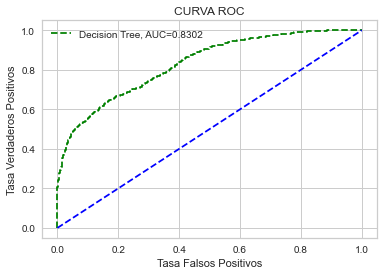

In [113]:
utils.curva_roc(y=y_train,modelo=Modelo,X=X_train)

Modelo AUC: 0.9996719460893916


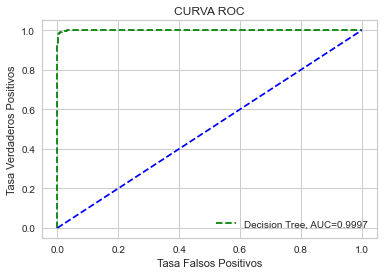

In [114]:
utils.curva_roc(y=y_train,modelo=xgb_model ,X=X_train)

Accuracy: 0.719558599695586
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       963
           1       0.82      0.72      0.76      1665

    accuracy                           0.72      2628
   macro avg       0.71      0.72      0.71      2628
weighted avg       0.74      0.72      0.72      2628



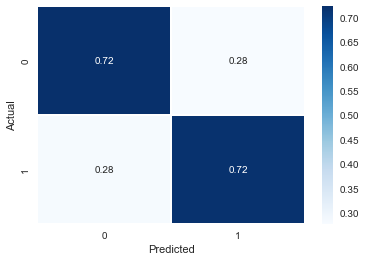

In [115]:
utils.MetricasMatrixConfusion(y=y_train,modelo=Modelo,X=X_train)

Accuracy: 0.9813546423135464
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       963
           1       0.97      1.00      0.99      1665

    accuracy                           0.98      2628
   macro avg       0.99      0.97      0.98      2628
weighted avg       0.98      0.98      0.98      2628



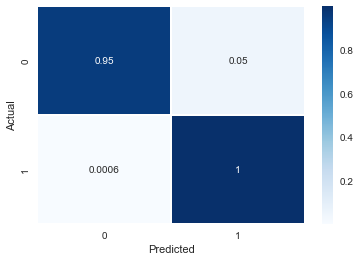

In [116]:
utils.MetricasMatrixConfusion(y=y_train,modelo=xgb_model ,X=X_train)

Modelo AUC: 1.0


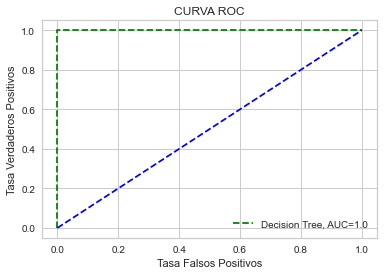

In [117]:
utils.curva_roc(y=y_test,modelo=Modelo,X=X_test)

Modelo AUC: 1.0


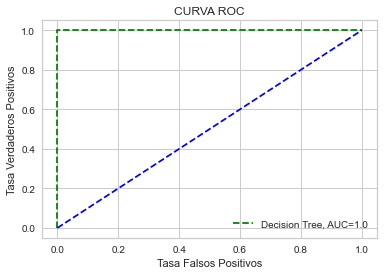

In [118]:
utils.curva_roc(y=y_test,modelo=xgb_model,X=X_test)

Accuracy: 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



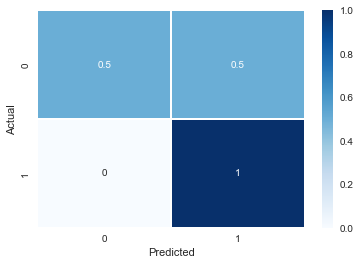

In [119]:
utils.MetricasMatrixConfusion(y=y_test,modelo=Modelo,X=X_test)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



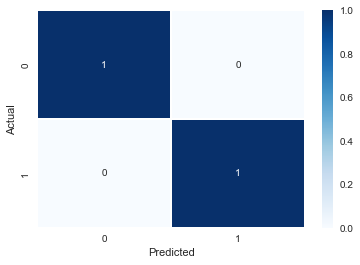

In [120]:
utils.MetricasMatrixConfusion(y=y_test,modelo=xgb_model,X=X_test)

In [121]:
Predicciones_Test = Modelo.predict(X_test)
Probabilidades_Test =Modelo.predict_proba(X_test)


In [122]:
Predicciones_Test1 = xgb_model.predict(X_test)
Probabilidades_Test1 =xgb_model.predict_proba(X_test)

In [123]:
ResultadoTEST=utils.Resultados(test,Predicciones_Test,Probabilidades_Test)
ResultadoTEST

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
0,2023-10-27,Greuther Furth,Osnabruck,4.000,0.000,0.699,0.406,Greuther Furth,1.000,1.000,W,0.293,Acerto
1,2023-10-27,Dusseldorf,Eintracht Braunschweig,4.000,1.000,0.615,0.513,Dusseldorf,1.000,1.000,W,0.102,Acerto


In [124]:
Val=pd.DataFrame(pd.crosstab(ResultadoTEST['date'], ResultadoTEST['Validacion']))
Val

Validacion,Acerto
date,
2023-10-27,2


In [125]:
ResultadoTEST.Validacion.value_counts(normalize=True)

Acerto   1.000
Name: Validacion, dtype: float64

In [126]:
ResultadoTEST.Validacion.value_counts()

Acerto    2
Name: Validacion, dtype: int64

In [127]:
ResultadoTEST[ResultadoTEST.Validacion=="NoAcerto"]

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion


In [128]:
ResultadoTEST.sort_values("date",ascending=False)

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
0,2023-10-27,Greuther Furth,Osnabruck,4.000,0.000,0.699,0.406,Greuther Furth,1.000,1.000,W,0.293,Acerto
1,2023-10-27,Dusseldorf,Eintracht Braunschweig,4.000,1.000,0.615,0.513,Dusseldorf,1.000,1.000,W,0.102,Acerto


In [129]:
ResultadoTEST1=utils.Resultados(test,Predicciones_Test1,Probabilidades_Test1)
ResultadoTEST1

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
0,2023-10-27,Greuther Furth,Osnabruck,4.000,0.000,0.959,0.337,Greuther Furth,1.000,1.000,W,0.622,Acerto
1,2023-10-27,Dusseldorf,Eintracht Braunschweig,4.000,1.000,0.958,0.225,Dusseldorf,1.000,1.000,W,0.733,Acerto


In [130]:
Val1=pd.DataFrame(pd.crosstab(ResultadoTEST1['date'], ResultadoTEST1['Validacion']))
Val1

Validacion,Acerto
date,
2023-10-27,2


In [131]:
ResultadoTEST1.Validacion.value_counts(normalize=True)

Acerto   1.000
Name: Validacion, dtype: float64

# **Predicciones Nuevas**

In [132]:
#stop

In [133]:
X=BaseModelos[FEATURES]

In [134]:
Modelo.fit(X,y)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features=0.7593961490586576,
                       min_impurity_decrease=1.429531703022848e-06,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=104, n_jobs=-1, random_state=123)

In [135]:
xgb_model.fit(X, y)

LGBMClassifier(random_state=123)

In [136]:
BaseModelos1=pd.concat([Total2[["date","target","result","team","opponent","gf","ga"]],X_Numericas_standard1,datos_dummies1],axis=1).reset_index(drop=True)
BaseModelos1.tail()

,date,target,result,team,opponent,gf,ga,round,day,dist,season,xg,xga,Mes,hour,suma_puntos,ga1,ga2,ga3,ga4,ga5,gf1,gf2,gf3,gf4,gf5,gf_promedio,gf_lag1,ga_promedio,ga_lag1,poss_promedio,poss_lag1,attendance_promedio,attendance_lag1,sh_promedio,sh_lag1,sot_promedio,sot_lag1,venue_Away,venue_Home,opponent_Arminia,opponent_Bochum,opponent_Darmstadt 98,opponent_Dresden,opponent_Dusseldorf,opponent_Eintracht Braunschweig,opponent_Elversberg,opponent_Erzgebirge Aue,opponent_Greuther Furth,opponent_Hamburger SV,opponent_Hannover 96,opponent_Hansa Rostock,opponent_Heidenheim,opponent_Hertha BSC,opponent_Holstein Kiel,opponent_Ingolstadt 04,opponent_Jahn Regensburg,opponent_Kaiserslautern,opponent_Karlsruher,opponent_Magdeburg,opponent_Nurnberg,opponent_Osnabruck,opponent_Paderborn 07,opponent_Sandhausen,opponent_Schalke 04,opponent_St Pauli,opponent_Stuttgart,opponent_Wehen Wiesbaden,opponent_Werder Bremen,opponent_Wurzburger Kickers,formation_3-1-4-2,formation_3-2-4-1,formation_3-3-3-1,formation_3-4-1-2,formation_3-4-3,formation_3-5-1-1,formation_3-5-2,formation_4-1-2-1-2,formation_4-1-3-2,formation_4-1-4-1,formation_4-2-2-2,formation_4-2-3-1,formation_4-3-1-2,formation_4-3-2-1,formation_4-3-3,formation_4-4-1-1,formation_4-4-2,formation_4-5-1,formation_5-3-2,formation_5-4-1,team_Arminia,team_Bochum,team_Darmstadt 98,team_Dresden,team_Dusseldorf,team_Eintracht Braunschweig,team_Elversberg,team_Erzgebirge Aue,team_Greuther Furth,team_Hamburger SV,team_Hannover 96,team_Hansa Rostock,team_Heidenheim,team_Hertha BSC,team_Holstein Kiel,team_Ingolstadt 04,team_Jahn Regensburg,team_Kaiserslautern,team_Karlsruher,team_Magdeburg,team_Nurnberg,team_Osnabruck,team_Paderborn 07,team_Sandhausen,team_Schalke 04,team_St Pauli,team_Stuttgart,team_Wehen Wiesbaden,team_Werder Bremen,team_Wurzburger Kickers,last1_D,last1_L,last1_SinResultado,last1_W,last2_D,last2_L,last2_SinResultado,last2_W,last3_D,last3_L,last3_SinResultado,last3_W,last4_D,last4_L,last4_SinResultado,last4_W,last5_D,last5_L,last5_SinResultado,last5_W,Local1_Away,Local1_Home,Local1_SinResultado,Local2_Away,Local2_Home,Local2_SinResultado,Local3_Away,Local3_Home,Local3_SinResultado,Local4_Away,Local4_Home,Local4_SinResultado,Local5_Away,Local5_Home,Local5_SinResultado
93,2023-11-03,0.000,L,Elversberg,St Pauli,0.000,2.000,-0.389,-2.183,0.992,0.000,-0.459,-0.122,0.569,2.067,-1.433,-0.050,-0.906,-0.980,-0.342,-0.418,0.728,-0.900,1.470,-0.330,-0.466,1.408,0.728,-0.530,-0.050,0.416,-0.184,-0.986,-0.307,0.265,-0.207,0.830,-0.079,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
94,2023-11-04,NaN,NaN,Elversberg,St Pauli,NaN,NaN,-0.389,-0.202,-0.995,0.000,-0.796,-0.796,0.569,-0.403,-1.433,0.770,-0.091,-0.980,-1.180,-0.418,-0.931,0.703,-1.013,1.372,-0.466,-1.068,-0.931,-1.043,0.770,-1.306,0.551,-0.943,-1.124,-1.262,-0.339,-1.219,-0.431,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
95,2023-11-10,1.000,W,Elversberg,Schalke 04,2.000,1.000,0.565,-2.183,1.345,0.000,-0.009,1.678,0.569,2.067,-1.393,-0.871,0.723,-0.159,-1.180,-1.253,-0.931,-0.900,0.642,-1.181,1.056,-0.077,-0.931,0.495,-0.871,0.274,-1.410,-0.943,-0.540,-0.221,-1.265,-0.194,-1.135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
96,2023-11-11,NaN,NaN,Elversberg,Schalke 04,NaN,NaN,0.565,-0.202,-0.995,0.000,-0.796,-0.796,0.569,-0.403,-1.393,-0.050,-0.906,0.662,-0.342,-1.253,0.728,-0.900,-1.013,0.521,-1.227,-1.068,0.728,-1.043,-0.050,-1.306,0.388,0.233,2.342,-1.262,0.455,-1.219,0.977,1,0,0,0,0,0,0,

In [137]:
nueva=BaseModelos1[FEATURES]

In [138]:
nueva.shape

(98, 148)

In [139]:
X_train.shape

(2628, 148)

In [140]:
Probabilidades_New =Modelo.predict_proba(nueva)
Predicciones_New  = Modelo.predict(nueva)
Probabilidades_New1 =xgb_model.predict_proba(nueva)
Predicciones_New1 = xgb_model.predict(nueva)

In [141]:
ResultadoRF=utils.Resultados(BaseModelos1,Predicciones_New,Probabilidades_New)
ResultadoRF

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
0,2023-11-25,Hamburger SV,Eintracht Braunschweig,NaN,NaN,0.745,0.434,Hamburger SV,1.000,NaN,NaN,0.311,NoAcerto
1,2023-11-25,Karlsruher,Nurnberg,NaN,NaN,0.600,0.451,Karlsruher,1.000,NaN,NaN,0.150,NoAcerto
2,2023-11-25,Greuther Furth,Wehen Wiesbaden,NaN,NaN,0.595,0.394,Greuther Furth,1.000,NaN,NaN,0.201,NoAcerto
3,2023-11-25,Dusseldorf,Schalke 04,NaN,NaN,0.569,0.415,Dusseldorf,1.000,NaN,NaN,0.154,NoAcerto
4,2023-11-25,Hannover 96,Hertha BSC,NaN,NaN,0.557,0.217,Hannover 96,1.000,NaN,NaN,0.340,NoAcerto
5,2023-11-25,Kaiserslautern,Holstein Kiel,NaN,NaN,0.549,0.452,Kaiserslautern,1.000,NaN,NaN,0.097,NoAcerto
6,2023-11-25,Hansa Rostock,St Pauli,NaN,NaN,0.496,0.405,Hansa Rostock,0.000,NaN,NaN,0.091,NoAcerto
7,2023-11-25,Magdeburg,Osnabruck,NaN,NaN,0.488,0.449,Magdeburg,0.000,NaN,NaN,0.038,NoAcerto
8,2023-11-25,Paderborn 07,Elversberg,NaN,NaN,0.410,0.091,Paderborn 07,0.000,NaN,NaN,0.319,NoAcerto
9,2023-11-12,Magdeburg,Hansa Rostock,1.000,2.000,0.607,0.381,Magdeburg,1.000,0.000,L,0.226,NoAcerto


In [142]:
ResultadoRF.sort_values("date",ascending=True)

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
48,2023-10-28,Paderborn 07,Hertha BSC,1.000,3.000,0.438,0.228,Paderborn 07,0.000,0.000,L,0.210,Acerto
40,2023-10-28,St Pauli,Karlsruher,2.000,1.000,0.787,0.492,St Pauli,1.000,1.000,W,0.295,Acerto
41,2023-10-28,Greuther Furth,Osnabruck,NaN,NaN,0.685,0.445,Greuther Furth,1.000,NaN,NaN,0.240,NoAcerto
42,2023-10-28,Kaiserslautern,Hamburger SV,3.000,3.000,0.682,0.594,Kaiserslautern,1.000,1.000,D,0.088,Acerto
47,2023-10-28,Wehen Wiesbaden,Hansa Rostock,NaN,NaN,0.593,0.473,Wehen Wiesbaden,1.000,NaN,NaN,0.120,NoAcerto
44,2023-10-28,Magdeburg,Elversberg,NaN,NaN,0.667,0.185,Magdeburg,1.000,NaN,NaN,0.482,NoAcerto
45,2023-10-28,Schalke 04,Hannover 96,3.000,2.000,0.617,0.470,Schalke 04,1.000,1.000,W,0.146,Acerto
46,2023-10-28,Eintracht Braunschweig,Dusseldorf,NaN,NaN,0.599,0.501,Eintracht Braunschweig,1.000,NaN,NaN,0.097,NoAcerto
43,2023-10-28,Holstein Kiel,Nurnberg,NaN,NaN,0.675,0.483,Holstein Kiel,1.000,NaN,NaN,0.191,NoAcerto
39,2023-10-29,Wehen Wiesbaden,Hansa Rostock,1.000,0.000,0.578,0.455,Wehen Wiesbaden,1.000,1.000,W,0.123,Acerto


In [143]:
ResultadoRF["Model"]="modelo1"
ResultadoRF["Liga"]=Liga
ResultadoRF["Temporada"]=Temporada
seleccion=["Temporada","date","Liga","Model","team_x","opponent_x","Probabilidad_x","Probabilidad_y","EquipoGanador"]
ResultadoRF=ResultadoRF[seleccion]

In [144]:
ResultadoRF.sort_values("date",ascending=True).to_excel("Pronosticos/Bundesliga2Pronosticos_RF"+FechaFinalTest+".xlsx",index=False)

In [145]:
ResultadoRF1=utils.Resultados(BaseModelos1,Predicciones_New1,Probabilidades_New1)
ResultadoRF1

,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
0,2023-11-25,Hamburger SV,Eintracht Braunschweig,NaN,NaN,0.937,0.677,Hamburger SV,1.000,NaN,NaN,0.260,NoAcerto
1,2023-11-25,Magdeburg,Osnabruck,NaN,NaN,0.886,0.408,Magdeburg,1.000,NaN,NaN,0.478,NoAcerto
2,2023-11-25,Karlsruher,Nurnberg,NaN,NaN,0.854,0.633,Karlsruher,1.000,NaN,NaN,0.221,NoAcerto
3,2023-11-25,Greuther Furth,Wehen Wiesbaden,NaN,NaN,0.846,0.684,Greuther Furth,1.000,NaN,NaN,0.162,NoAcerto
4,2023-11-25,Hannover 96,Hertha BSC,NaN,NaN,0.828,0.042,Hannover 96,1.000,NaN,NaN,0.787,NoAcerto
5,2023-11-25,Kaiserslautern,Holstein Kiel,NaN,NaN,0.797,0.567,Kaiserslautern,1.000,NaN,NaN,0.230,NoAcerto
6,2023-11-25,Dusseldorf,Schalke 04,NaN,NaN,0.794,0.372,Dusseldorf,1.000,NaN,NaN,0.422,NoAcerto
7,2023-11-25,Hansa Rostock,St Pauli,NaN,NaN,0.739,0.455,Hansa Rostock,1.000,NaN,NaN,0.283,NoAcerto
8,2023-11-25,Paderborn 07,Elversberg,NaN,NaN,0.433,0.051,Paderborn 07,0.000,NaN,NaN,0.382,NoAcerto
9,2023-11-12,Greuther Furth,Dusseldorf,1.000,0.000,0.693,0.503,Greuther Furth,1.000,1.000,W,0.190,Acerto


In [146]:
ResultadoRF1["Model"]="modelo2"
ResultadoRF1["Liga"]=Liga
ResultadoRF1["Temporada"]=Temporada
ResultadoRF1=ResultadoRF1[seleccion]

In [147]:
ResultadoRF1.sort_values("date",ascending=True)

,Temporada,date,Liga,Model,team_x,opponent_x,Probabilidad_x,Probabilidad_y,EquipoGanador
48,2024,2023-10-28,Bundesliga2,modelo2,Paderborn 07,Hertha BSC,0.510,0.040,Paderborn 07
40,2024,2023-10-28,Bundesliga2,modelo2,St Pauli,Karlsruher,0.966,0.838,St Pauli
41,2024,2023-10-28,Bundesliga2,modelo2,Holstein Kiel,Nurnberg,0.905,0.859,Holstein Kiel
42,2024,2023-10-28,Bundesliga2,modelo2,Hamburger SV,Kaiserslautern,0.885,0.796,Hamburger SV
47,2024,2023-10-28,Bundesliga2,modelo2,Schalke 04,Hannover 96,0.728,0.421,Schalke 04
44,2024,2023-10-28,Bundesliga2,modelo2,Wehen Wiesbaden,Hansa Rostock,0.814,0.593,Wehen Wiesbaden
45,2024,2023-10-28,Bundesliga2,modelo2,Greuther Furth,Osnabruck,0.797,0.713,Greuther Furth
46,2024,2023-10-28,Bundesliga2,modelo2,Magdeburg,Elversberg,0.745,0.048,Magdeburg
43,2024,2023-10-28,Bundesliga2,modelo2,Dusseldorf,Eintracht Braunschweig,0.881,0.766,Dusseldorf
39,2024,2023-10-29,Bundesliga2,modelo2,Wehen Wiesbaden,Hansa Rostock,0.568,0.560,Wehen Wiesbaden


In [148]:
ResultadoRF1.sort_values("date",ascending=True).to_excel("Pronosticos/Bundesliga2Pronosticos_XGB"+FechaFinalTest+".xlsx",index=False)

## **Red Neuronal**

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificación de etiquetas
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_train = encoder.fit_transform(y_train)

# Normalización de datos
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Definición del modelo
model = Sequential()
model.add(Dense(207, input_dim=X_train.shape[1], activation='relu')) # Capa de entrada
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(150, activation='relu')) # Capa oculta
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(100, activation='relu')) # Capa oculta
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(80, activation='relu')) # Capa oculta
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(32, activation='relu')) # Capa oculta
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(16, activation='relu')) # Capa oculta
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(1, activation='sigmoid')) # Capa de salida

# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['AUC'])

# Parada temprana para prevenir el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Entrenamiento del modelo
model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=[early_stopping])

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/500


2023-11-23 12:09:37.047375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


66/66 [==============================] - 1s 6ms/step - loss: 0.6614 - auc: 0.5179 - val_loss: 0.6770 - val_auc: 0.5401
Epoch 2/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6467 - auc: 0.5741 - val_loss: 0.6686 - val_auc: 0.5913
Epoch 3/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6418 - auc: 0.5907 - val_loss: 0.6666 - val_auc: 0.5859
Epoch 4/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6324 - auc: 0.6124 - val_loss: 0.6699 - val_auc: 0.5784
Epoch 5/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6232 - auc: 0.6395 - val_loss: 0.6565 - val_auc: 0.6085
Epoch 6/500
66/66 [==============================] - 0s 2ms/step - loss: 0.6036 - auc: 0.6851 - val_loss: 0.6567 - val_auc: 0.6424
Epoch 7/500
66/66 [==============================] - 0s 2ms/step - loss: 0.5930 - auc: 0.6970 - val_loss: 0.6504 - val_auc: 0.6257
Epoch 8/500
66/66 [==============================] - 0s 2ms/step - loss: 0.5683 - auc: 0.7412 -

In [150]:
# Genera las probabilidades
y_prob = model.predict(nueva)

# Generar las probabilidades de la clase positiva
y_prob_pos = model.predict(nueva)

# Calcular las probabilidades de la clase negativa
y_prob_neg = 1 - y_prob_pos

# Concatenar las dos matrices para obtener el formato deseado
y_prob = np.hstack((y_prob_neg, y_prob_pos))
# Genera las predicciones de clase
y_pred = (model.predict(nueva) > 0.5).astype(int)

# Si necesitas aplanar el array a una dimensión (dependiendo de la versión de TensorFlow puede devolver un array 2D)
y_pred = y_pred.flatten()
ResultadoRF3=utils.Resultados(BaseModelos1,y_pred,y_prob)
ResultadoRF3.sort_values("date",ascending=True)

4/4 [==============================] - 0s 1ms/step


,date,team_x,opponent_x,gf,ga,Probabilidad_x,Probabilidad_y,EquipoGanador,PrediccionFinal,Target,ResultadoFinal,PreditFinal1,Validacion
48,2023-10-28,Magdeburg,Elversberg,NaN,NaN,0.557,0.326,Magdeburg,1.000,NaN,NaN,0.231,NoAcerto
40,2023-10-28,St Pauli,Karlsruher,2.000,1.000,1.000,0.881,St Pauli,1.000,1.000,W,0.119,Acerto
41,2023-10-28,Greuther Furth,Osnabruck,NaN,NaN,1.000,0.365,Greuther Furth,1.000,NaN,NaN,0.635,NoAcerto
42,2023-10-28,Dusseldorf,Eintracht Braunschweig,NaN,NaN,0.999,0.279,Dusseldorf,1.000,NaN,NaN,0.721,NoAcerto
47,2023-10-28,Hamburger SV,Kaiserslautern,3.000,3.000,0.693,0.619,Hamburger SV,1.000,1.000,D,0.074,Acerto
44,2023-10-28,Hannover 96,Schalke 04,2.000,3.000,0.991,0.475,Hannover 96,1.000,0.000,L,0.516,NoAcerto
45,2023-10-28,Hansa Rostock,Wehen Wiesbaden,NaN,NaN,0.725,0.420,Hansa Rostock,1.000,NaN,NaN,0.305,NoAcerto
46,2023-10-28,Paderborn 07,Hertha BSC,1.000,3.000,0.708,0.311,Paderborn 07,1.000,0.000,L,0.397,NoAcerto
43,2023-10-28,Nurnberg,Holstein Kiel,NaN,NaN,0.998,0.990,Nurnberg,1.000,NaN,NaN,0.008,NoAcerto
39,2023-10-29,Wehen Wiesbaden,Hansa Rostock,1.000,0.000,0.346,0.231,Wehen Wiesbaden,0.000,1.000,W,0.114,NoAcerto


In [151]:
ResultadoRF3["Model"]="modelo3"
ResultadoRF3["Liga"]=Liga
ResultadoRF3["Temporada"]=Temporada
ResultadoRF3=ResultadoRF3[seleccion]

In [152]:
ResultadoRF3.sort_values("date",ascending=True)

,Temporada,date,Liga,Model,team_x,opponent_x,Probabilidad_x,Probabilidad_y,EquipoGanador
48,2024,2023-10-28,Bundesliga2,modelo3,Magdeburg,Elversberg,0.557,0.326,Magdeburg
40,2024,2023-10-28,Bundesliga2,modelo3,St Pauli,Karlsruher,1.000,0.881,St Pauli
41,2024,2023-10-28,Bundesliga2,modelo3,Greuther Furth,Osnabruck,1.000,0.365,Greuther Furth
42,2024,2023-10-28,Bundesliga2,modelo3,Dusseldorf,Eintracht Braunschweig,0.999,0.279,Dusseldorf
47,2024,2023-10-28,Bundesliga2,modelo3,Hamburger SV,Kaiserslautern,0.693,0.619,Hamburger SV
44,2024,2023-10-28,Bundesliga2,modelo3,Hannover 96,Schalke 04,0.991,0.475,Hannover 96
45,2024,2023-10-28,Bundesliga2,modelo3,Hansa Rostock,Wehen Wiesbaden,0.725,0.420,Hansa Rostock
46,2024,2023-10-28,Bundesliga2,modelo3,Paderborn 07,Hertha BSC,0.708,0.311,Paderborn 07
43,2024,2023-10-28,Bundesliga2,modelo3,Nurnberg,Holstein Kiel,0.998,0.990,Nurnberg
39,2024,2023-10-29,Bundesliga2,modelo3,Wehen Wiesbaden,Hansa Rostock,0.346,0.231,Wehen Wiesbaden


In [153]:
ResultadoRF3.sort_values("date",ascending=True).to_excel("Pronosticos/Bundesliga2Pronosticos_RedNeuronal"+FechaFinalTest+".xlsx",index=False)